# Instructor Do: Portfolio Returns

In [10]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

 # Data Preparation

In [11]:
# Read the EMB Historical Closing Prices
enb_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\07-Ins_Portfolio_Returns\Resources\emb_historical.csv")
enb = pd.read_csv(enb_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
enb = enb.sort_index()
enb.head()

Symbol   NOCP
Trade DATE              
2018-05-15    ENB  12.45
2018-05-16    ENB  12.82
2018-05-17    ENB  12.82
2018-05-18    ENB  13.00
2018-05-21    ENB  12.99

In [12]:
# Read the IMO Historical Closing Prices
imo_data = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\07-Ins_Portfolio_Returns\Resources\imo_historical.csv")
imo = pd.read_csv(imo_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
imo = imo.sort_index()
imo.head()

Symbol   NOCP
Trade DATE              
2018-05-15    IMO  54.01
2018-05-16    IMO  56.50
2018-05-17    IMO  54.70
2018-05-18    IMO  53.39
2018-05-21    IMO  55.48

In [13]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([enb['NOCP'], imo['NOCP']], axis='columns', join='inner')
combined_df.columns = ['ENB', 'IMO']
combined_df

ENB    IMO
Trade DATE              
2018-05-15  12.45  54.01
2018-05-16  12.82  56.50
2018-05-17  12.82  54.70
2018-05-18  13.00  53.39
2018-05-21  12.99  55.48
...           ...    ...
2019-05-07  26.66  40.26
2019-05-08  27.09  39.75
2019-05-09  27.21  39.27
2019-05-10  27.96  38.94
2019-05-13  26.24  37.38

[250 rows x 2 columns]

In [14]:
# all_prices = pd.concat([enb, imo], axis="rows", join="inner")
# all_prices = all_prices.reset_index()
# all_prices = all_prices.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
# all_prices.head()

 # Portfolio Returns

In [15]:
# Calculate Daily Returns
daily_returns = combined_df.pct_change()
daily_returns.head()

ENB       IMO
Trade DATE                    
2018-05-15       NaN       NaN
2018-05-16  0.029719  0.046103
2018-05-17  0.000000 -0.031858
2018-05-18  0.014041 -0.023949
2018-05-21 -0.000769  0.039146

In [16]:
# all_returns = all_prices.pct_change()
# all_returns.head()

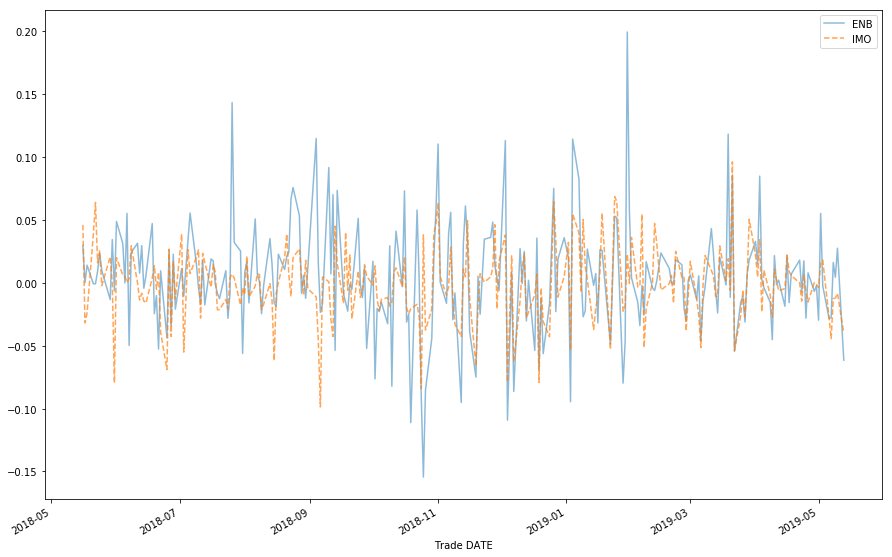

In [17]:
plot1 = daily_returns['ENB'].plot(figsize=(15, 10), alpha=0.5)
daily_returns['IMO'].plot(ax=plot1, alpha=0.7, linestyle='dashed')

plot1.legend(['ENB', 'IMO'])

In [18]:
enb_std = daily_returns['ENB'].std()
imo_std = daily_returns['IMO'].std()

print(f"ENB std: {enb_std}")
print(f"IMO std: {imo_std}")

ENB std: 0.043001221273728574
IMO std: 0.029079498569900514


In [19]:
# Calculate Portfolio Returns with an equal amount of each stock
enb_weight = 0.5
imo_weight = 0.5

portfolio_returns = enb_weight * daily_returns['ENB'] + imo_weight * daily_returns['IMO']
portfolio_returns.head()

Trade DATE
2018-05-15         NaN
2018-05-16    0.037911
2018-05-17   -0.015929
2018-05-18   -0.004954
2018-05-21    0.019188
dtype: float64

In [20]:
# Shortcut for calculating returns
weights = [0.5, 0.5]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns

Trade DATE
2018-05-15         NaN
2018-05-16    0.037911
2018-05-17   -0.015929
2018-05-18   -0.004954
2018-05-21    0.019188
                ...   
2019-05-07   -0.036052
2019-05-08    0.001731
2019-05-09   -0.003823
2019-05-10    0.009580
2019-05-13   -0.050789
Length: 250, dtype: float64

 # Risk Management
 
 ## Calculate Volatility

In [21]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = daily_returns.std() * np.sqrt(252)
volatility

ENB    0.682623
IMO    0.461623
dtype: float64

## Set Portfolio Allocations/Weights and Calculate Portfolio Daily Returns

### Higher Volalitity Portfolio (More risk, but potentially higher returns)

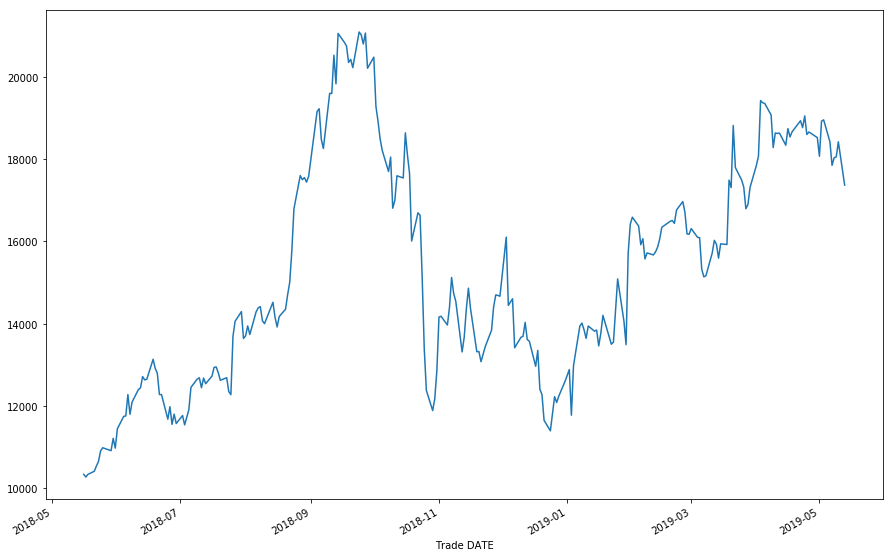

In [22]:
# Set initial investment
initial_inv = 10000

# Set weights
weights = [0.8, 0.2]
          
# Use the `dot` function to multiply the weights by each column of daily returns to calculate the daily returns of the portfolio.
portfolio_returns = daily_returns.dot(weights)
#portfolio_returns

# Use the `cumprod` function to calculate cumulative returns
cum_returns = (1 + portfolio_returns).cumprod()
cum_returns

# Compute cumulative returns
cumulative_profit = initial_inv * cum_returns

# Plot the returns of the investment
cumulative_profit.plot(figsize=(15,10))

### Lower Volalitity Portfolio (Less risk, but potentially lower returns)

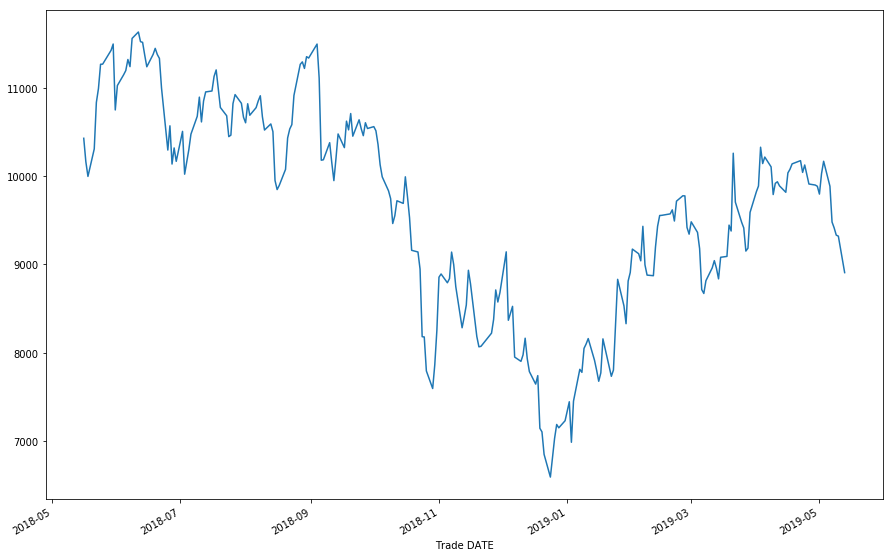

In [23]:
# Set initial investment
initial_inv = 10000

# Set weights
weights = [0.2, 0.8]
          
# Use the `dot` function to multiply the weights by each column of daily returns to calculate the daily returns of the portfolio.
portfolio_returns = daily_returns.dot(weights)
#portfolio_returns

# Use the `cumprod` function to calculate cumulative returns
cum_returns = (1 + portfolio_returns).cumprod()
cum_returns

# Compute cumulative returns
cumulative_profit = initial_inv * cum_returns

# Plot the returns of the investment
cumulative_profit.plot(figsize=(15,10))
